![''](hospital.jpg)

Each column provides specific information about the patient, their admission, and the healthcare services provided, making this dataset suitable for various data analysis and modeling tasks in the healthcare domain. Here's a brief explanation of each column in the dataset:

- **Name**: This column represents the name of the patient associated with the healthcare record.
- **Age**: The age of the patient at the time of admission, expressed in years.
- **Gender**: Indicates the gender of the patient, either "Male" or "Female."
- **Blood Type**: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).
- **Medical Condition**: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.
- **Date of Admission**: The date on which the patient was admitted to the healthcare facility.
- **Doctor**: The name of the doctor responsible for the patient's care during their admission.
- **Hospital**: Identifies the healthcare facility or hospital where the patient was admitted.
- **Insurance Provider**: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."
- **Billing Amount**: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.
- **Room Number**: The room number where the patient was accommodated during their admission.
- **Admission Type**: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.
- **Discharge Date**: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.
- **Medication**: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."
- **Test Results**: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('healthcare_dataset.csv')

In [4]:
df.drop(['Doctor','Hospital','Room Number'], axis=1, inplace=True)
df['Name'] = df['Name'].apply(lambda x: str(x).title())
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Blue Cross,18856.281306,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Medicare,33643.327287,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Aetna,27955.096079,Emergency,2022-10-07,Aspirin,Normal
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Medicare,37909.782410,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Aetna,14238.317814,Urgent,2022-10-09,Penicillin,Abnormal


In [60]:
datecolumns = ['Date of Admission','Discharge Date']
for col in datecolumns:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d', errors='coerce')

df.dtypes

Name                          object
Age                            int64
Gender                        object
Blood Type                    object
Medical Condition             object
Date of Admission     datetime64[ns]
Insurance Provider            object
Billing Amount               float64
Admission Type                object
Discharge Date        datetime64[ns]
Medication                    object
Test Results                  object
Month                      period[M]
dtype: object

## Distributions

#### Age distribution

Text(0.5, 1.0, 'Distribution of age')

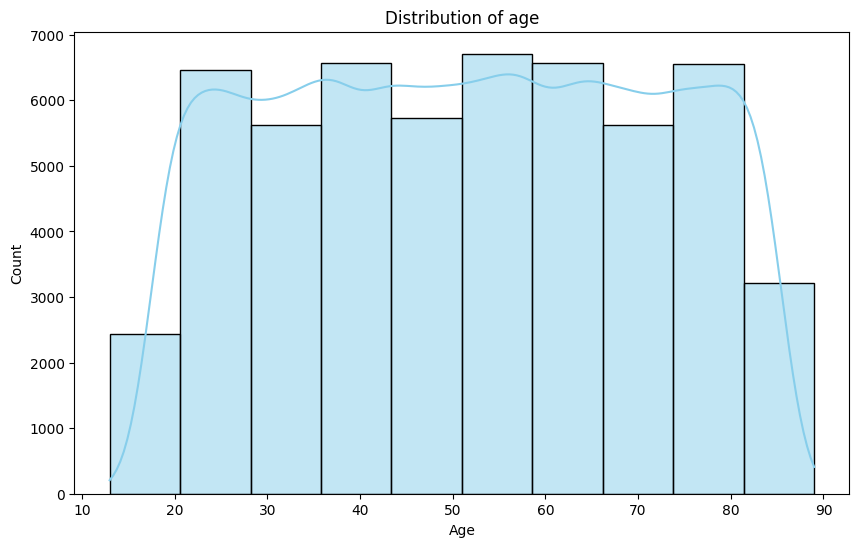

In [6]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of age')

#### Gender distribution

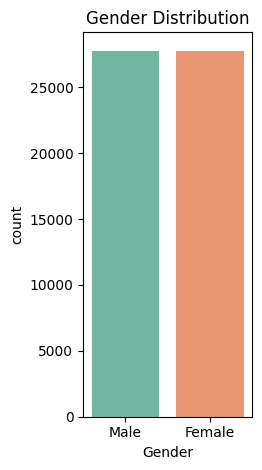

In [7]:
plt.subplot(1,3,1)
sns.countplot(x=df['Gender'], palette='Set2')
plt.title('Gender Distribution')
plt.tight_layout()

#### Blood type distribution

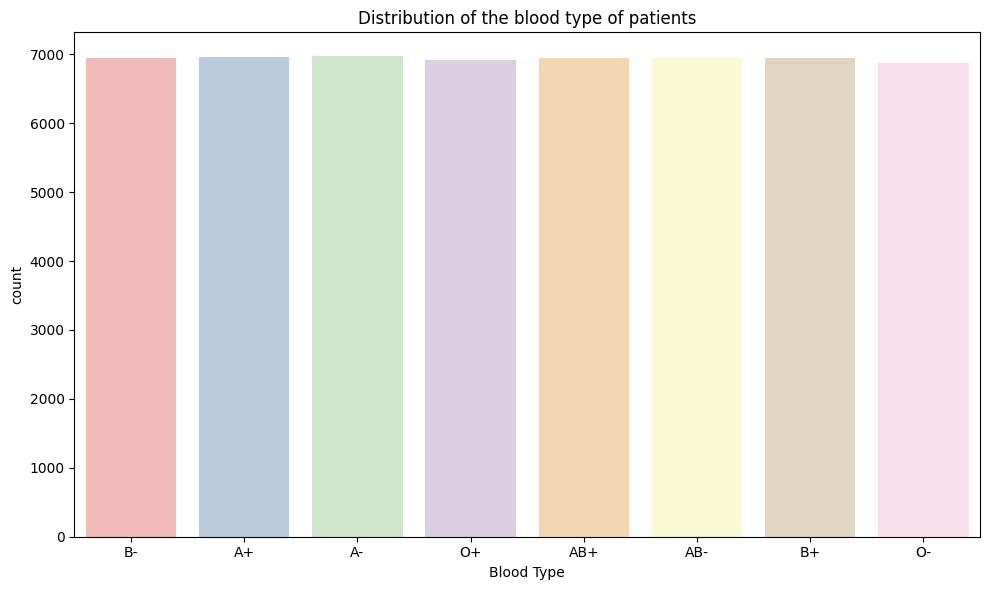

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['Blood Type'], palette='Pastel1')
plt.title('Distribution of the blood type of patients')
plt.tight_layout()

## Medical Conditions

### Distribution of medical conditions

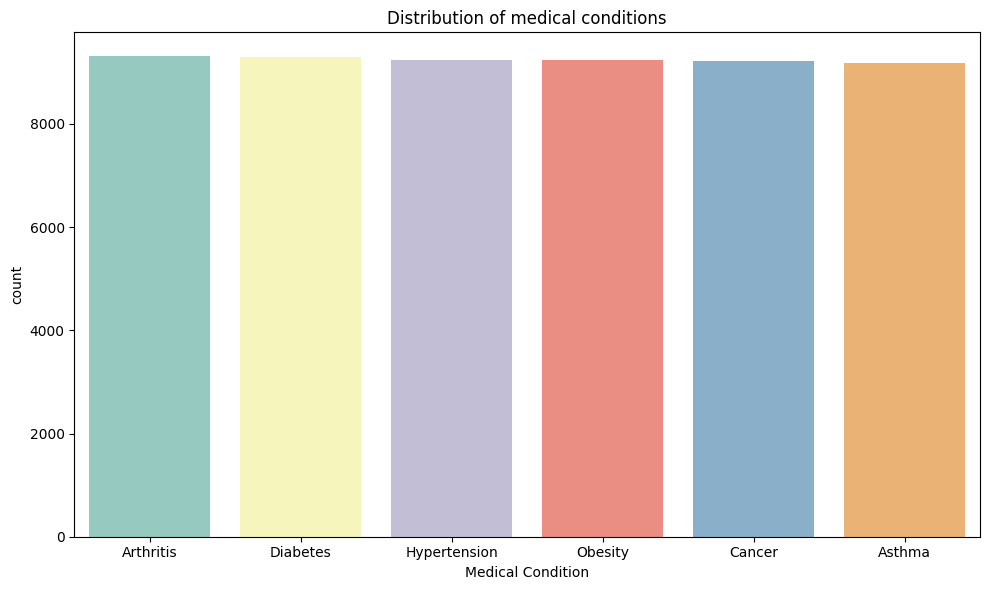

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['Medical Condition'], palette='Set3', order=df['Medical Condition'].value_counts().index)
plt.title('Distribution of medical conditions')
plt.tight_layout()

### Relation between age and medical condition

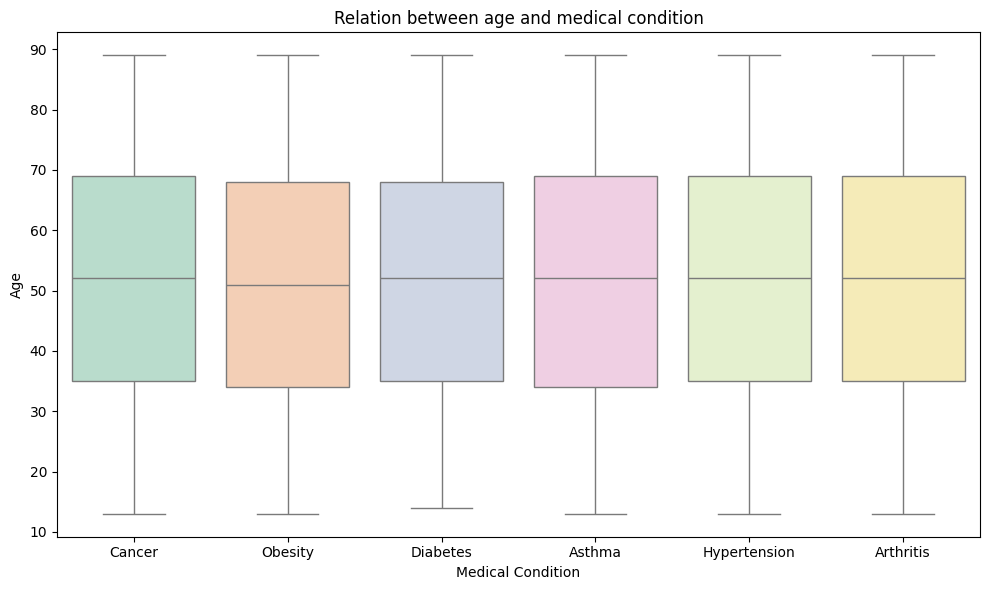

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(x= df['Medical Condition'], y=df['Age'], palette='Pastel2')
plt.title('Relation between age and medical condition')
plt.tight_layout()

## Admission Analysis

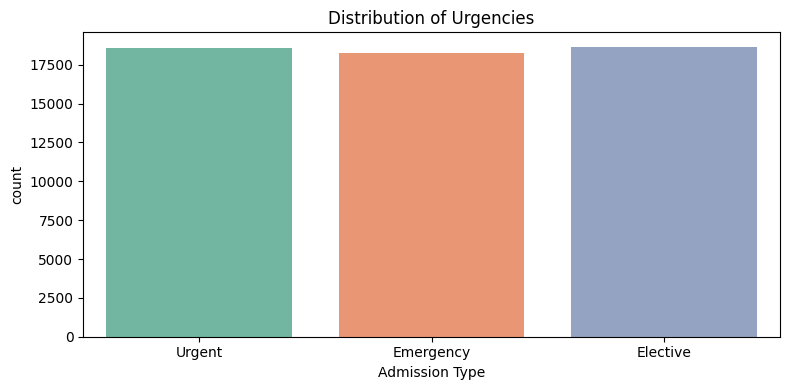

In [11]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['Admission Type'], palette='Set2')
plt.title('Distribution of Urgencies')
plt.tight_layout()

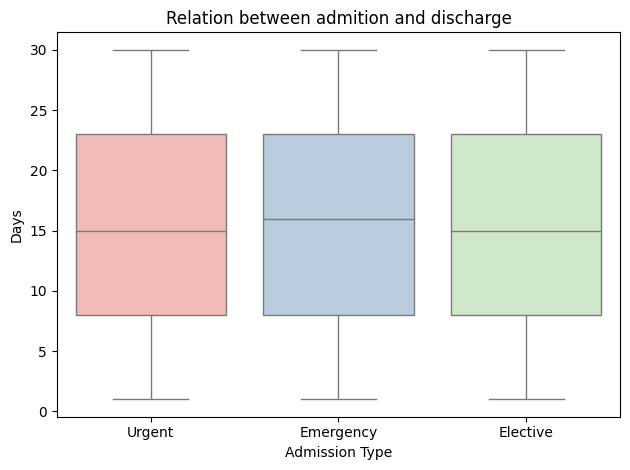

In [12]:
sns.boxplot(y=((df['Discharge Date'] - df['Date of Admission']).dt.days), x=df['Admission Type'], palette='Pastel1')
plt.title('Relation between admition and discharge')
plt.ylabel('Days')
plt.tight_layout()

## Insurance Analysis

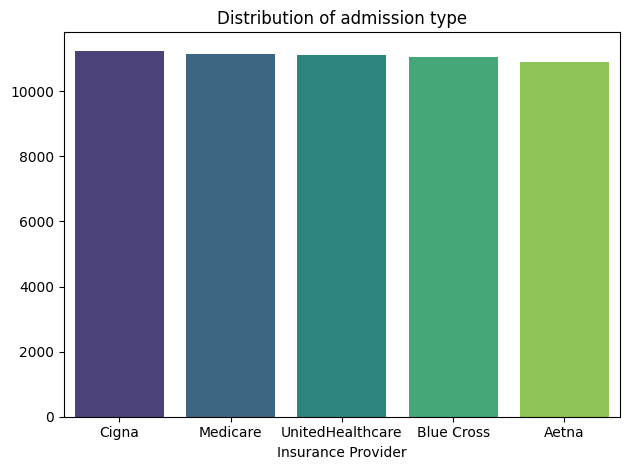

In [21]:
num_patients = df['Insurance Provider'].value_counts()

sns.barplot(x= num_patients.index, y= num_patients.values, palette='viridis')
plt.title("Distribution of admission type")
plt.tight_layout()
plt.show()

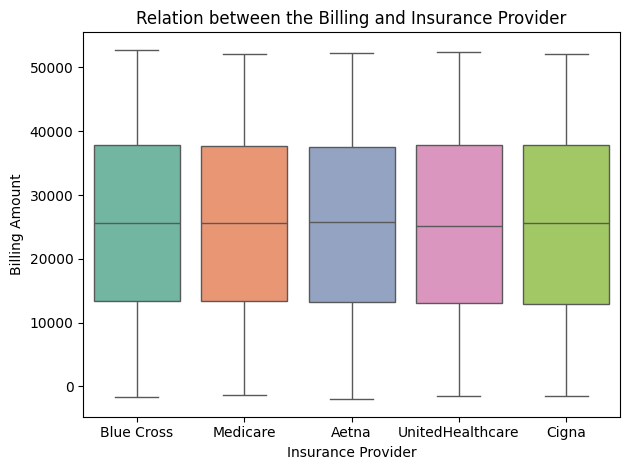

In [14]:
sns.boxplot(x= df['Insurance Provider'], y= df['Billing Amount'], palette='Set2')
plt.title("Relation between the Billing and Insurance Provider")
plt.tight_layout()
plt.show()

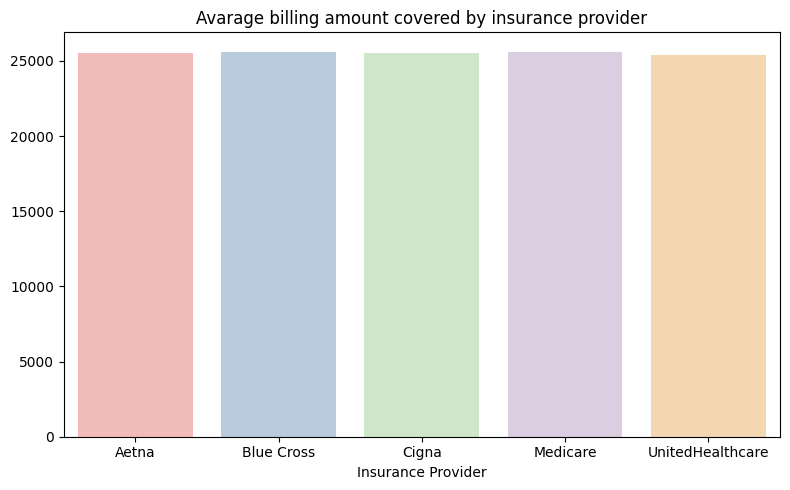

In [15]:
providers = df.groupby('Insurance Provider')['Billing Amount'].mean()

plt.figure(figsize=(8,5))
sns.barplot(x=providers.index, y=providers.values, palette='Pastel1')
plt.title("Avarage billing amount covered by insurance provider")
plt.tight_layout()
plt.show()

## Medication Analysis

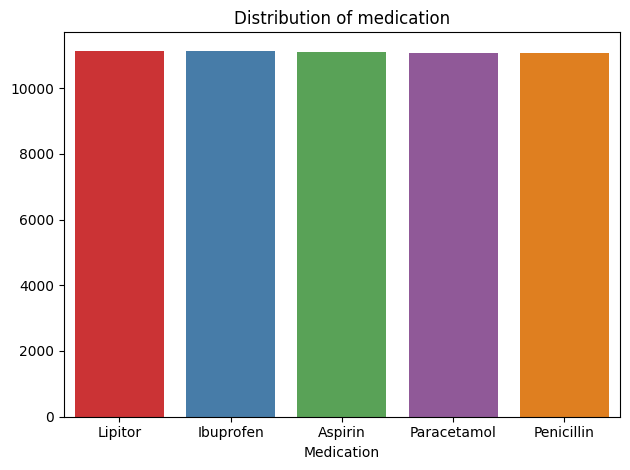

In [16]:
med = df['Medication'].value_counts()

sns.barplot(x=med.index, y=med.values, palette='Set1')
plt.title('Distribution of medication')
plt.tight_layout()

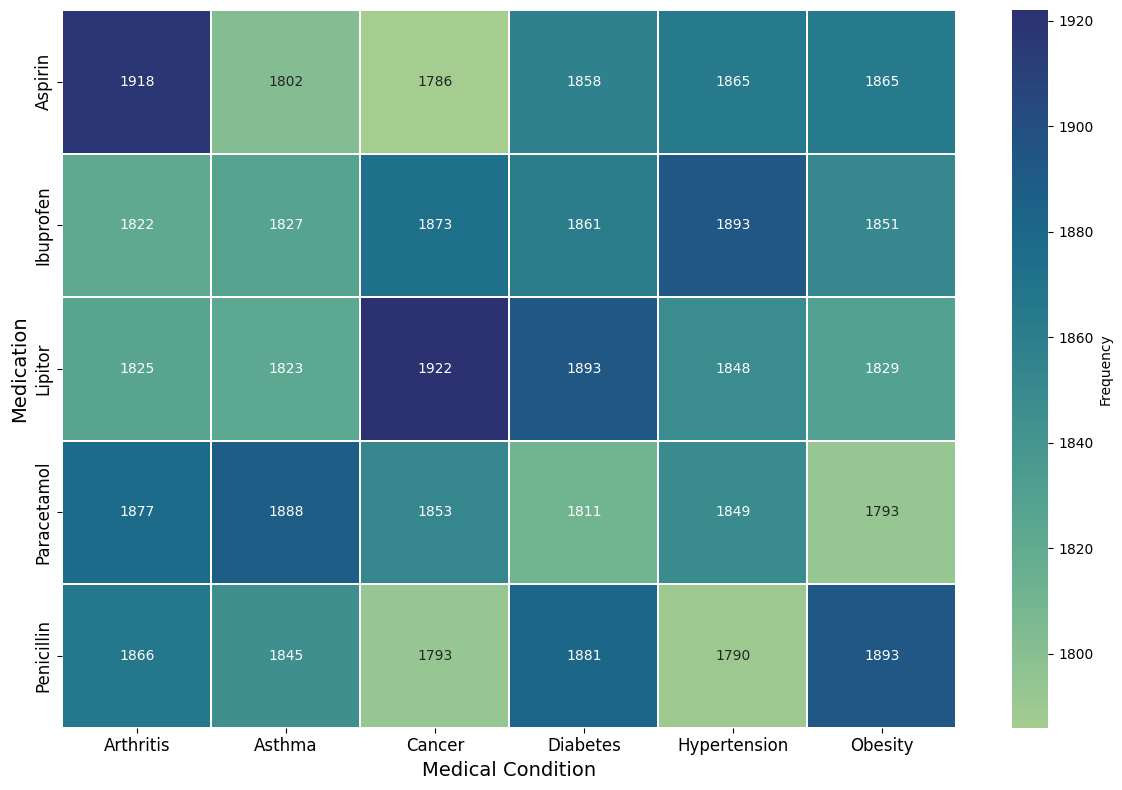

In [17]:
med_condition_medical = pd.crosstab(df['Medication'], df['Medical Condition'])

plt.figure(figsize=(12,8))
sns.heatmap(med_condition_medical, annot=True, cmap='crest', fmt='d', linecolor='White', linewidths=0.1, cbar_kws={'label': 'Frequency'})
plt.xlabel('Medical Condition', fontsize=14)
plt.ylabel('Medication', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

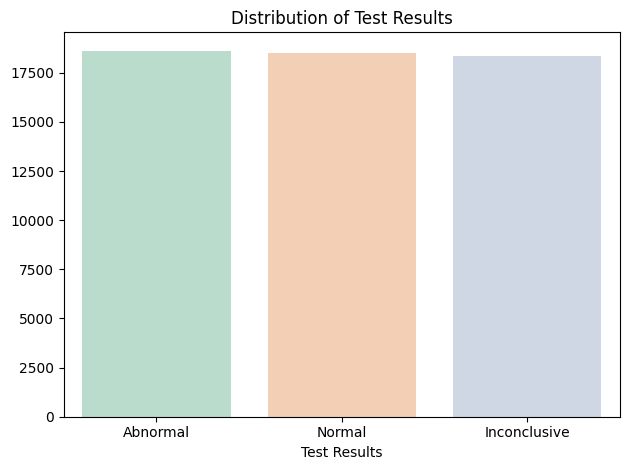

In [24]:
effect = df['Test Results'].value_counts()

sns.barplot(x=effect.index, y=effect.values, palette='Pastel2')
plt.title('Distribution of Test Results')
plt.tight_layout()
plt.show()

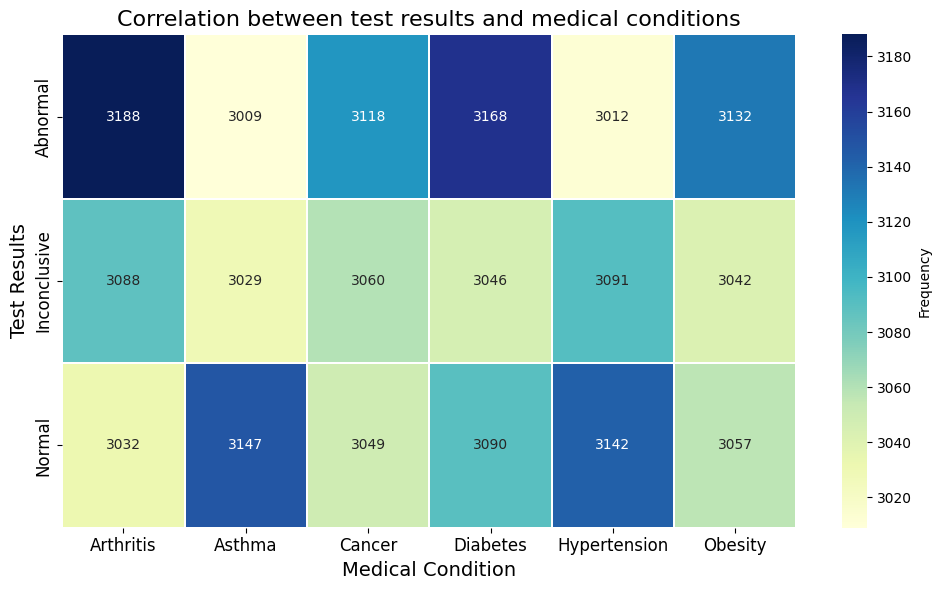

In [34]:
result_medical_condition = pd.crosstab(df['Test Results'], df['Medical Condition'])

plt.figure(figsize=(10,6))
sns.heatmap(result_medical_condition, annot=True, cmap='YlGnBu', fmt='d', linecolor='White', linewidths=0.1, cbar_kws={'label': 'Frequency'})
plt.title('Correlation between test results and medical conditions', fontsize=16)
plt.xlabel('Medical Condition', fontsize=14)
plt.ylabel('Test Results', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

## Overall Healhcare

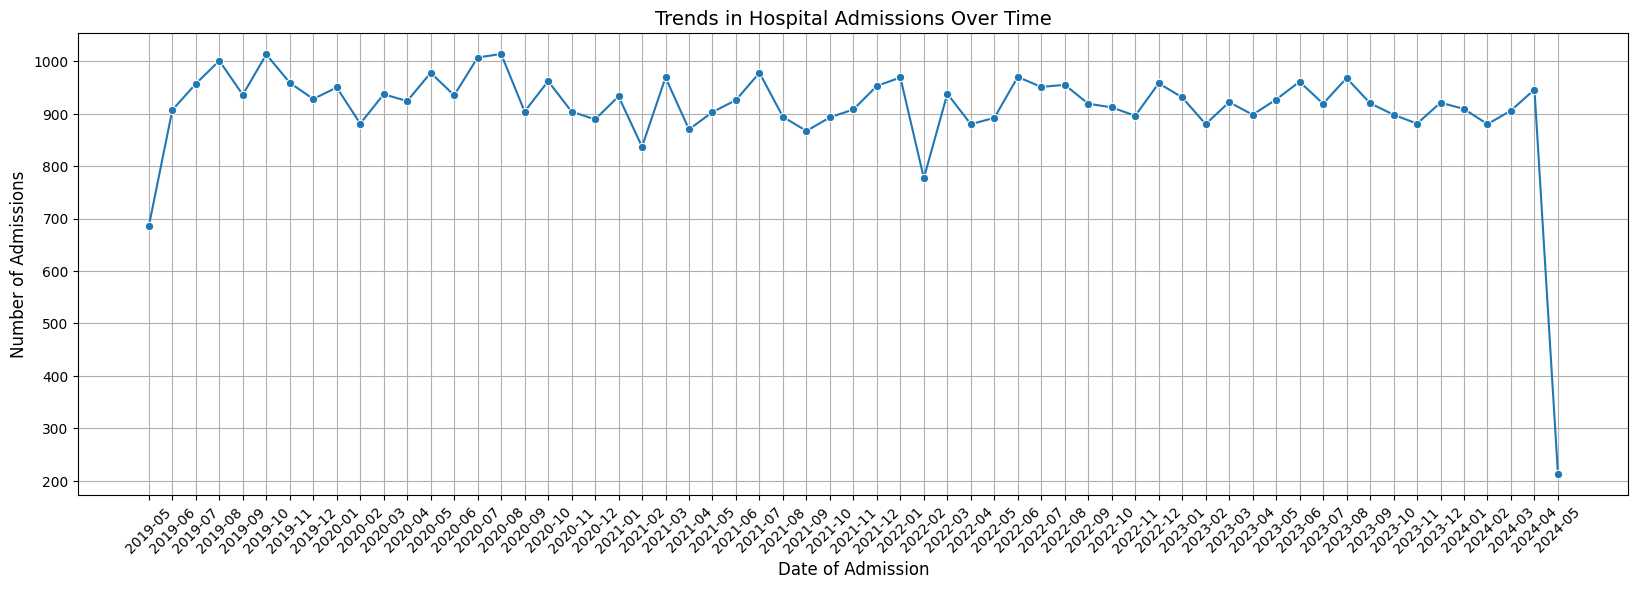

In [63]:
df['Month'] = df['Date of Admission'].dt.to_period('M')
month_admissions = df['Month'].value_counts().sort_index()

plt.figure(figsize=(20, 6))
sns.lineplot(x=month_admissions.index.astype(str), y=month_admissions.values, marker='o')
plt.title('Trends in Hospital Admissions Over Time', fontsize=14)
plt.xlabel('Date of Admission', fontsize=12)
plt.ylabel('Number of Admissions', fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.show()